# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
# import chardet

# with open('PoliceShootingsUS.csv', 'rb') as f:
#     content = f.read()
#     result = chardet.detect(content)
# result

In [2]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())


In [3]:
from zipfile import ZipFile
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data.zip'
download_file(file_name, file_url)

In [4]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [5]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [6]:
## Your code is here


import chardet
with open('PoliceShootingsUS.csv', 'rb') as f:
    content = f.read()
    result = chardet.detect(content)
    print(result)
     

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [7]:
chardet.detect(open('PoliceShootingsUS.csv', 'rb').read())


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [8]:
import pandas as pd
police = pd.read_csv('PoliceShootingsUS.csv', encoding='Windows-1252')
police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
len(police[(police.age > 55)])

235

* What's the age distribution?

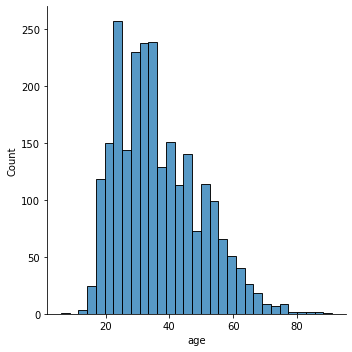

In [10]:
## Your code is here
import seaborn as sns
from matplotlib import pyplot as plt
sns.displot(police['age'])

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [11]:
## Your code is here
import re
with open('volunteers.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        res1 = re.findall(r'\[(.*)\]', line)
        res2 = re.findall(r'\((.*)\)', line)
        df = pd.DataFrame(list(zip(res1, res2)), columns = ['Fullname','State'])
        df[['Name', 'Lastname']] = df['Fullname'].str.split(',', expand=True)
        print(df[['Name', 'Lastname','State']])
        
        

      Name    Lastname     State
0  Harding   Christine  Virginia
    Name   Lastname     State
0  Davis   Kimberly  New York
     Name Lastname      State
0  Ingram   Rachel  Louisiana
     Name  Lastname   State
0  Walker   Richard  Oregon
     Name    Lastname     State
0  Barnes   Francisco  Virginia
    Name Lastname   State
0  Perez   Rachel  Alaska
   Name Lastname State
0  Choi    Linda  Iowa
    Name Lastname    State
0  Gomez   Janice  Vermont
    Name Lastname        State
0  Lloyd    Jesus  Connecticut
    Name Lastname     State
0  Moore   Alicia  Michigan
     Name Lastname    State
0  Murray   Pamela  Arizona
    Name   Lastname       State
0  Moore   Brittney  Washington
    Name    Lastname    State
0  Jones   Alexander  Arizona
      Name Lastname    State
0  Morales    David  Florida
    Name    Lastname         State
0  Hogan   Elizabeth  Rhode Island
    Name   Lastname         State
0  Floyd   Courtney  Pennsylvania
    Name Lastname          State
0  Scott     Ma